In [55]:
from evaluate import load
from datasets import load_dataset
from transformers import AutoModelForCausalLM,GPTNeoForCausalLM

perplexity=load("perplexity",module_type="metric")
dataset = load_dataset("wikitext", "wikitext-2-raw-v1", split="test")
model=AutoModelForCausalLM.from_pretrained("gpt2")


In [56]:
model2 = GPTNeoForCausalLM.from_pretrained("EleutherAI/gpt-neo-1.3B")

d:\Amritha\myenv\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\LENOVO\.cache\huggingface\hub\models--EleutherAI--gpt-neo-1.3B. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [57]:
dataset[3]

{'text': ' Robert Boulter is an English film , television and theatre actor . He had a guest @-@ starring role on the television series The Bill in 2000 . This was followed by a starring role in the play Herons written by Simon Stephens , which was performed in 2001 at the Royal Court Theatre . He had a guest role in the television series Judge John Deed in 2002 . In 2004 Boulter landed a role as " Craig " in the episode " Teddy \'s Story " of the television series The Long Firm ; he starred alongside actors Mark Strong and Derek Jacobi . He was cast in the 2005 theatre productions of the Philip Ridley play Mercury Fur , which was performed at the Drum Theatre in Plymouth and the Menier Chocolate Factory in London . He was directed by John Tiffany and starred alongside Ben Whishaw , Shane Zaza , Harry Kent , Fraser Ayres , Sophie Stanton and Dominic Hall . \n'}

Perplexity quantifies a model’s uncertainty in predicting the next token in a sequence.
Perplexity is defined as the exponentiated average log-likelihood of the predicted words in a sequence. 
The perplexity score of a language model on a sequence of tokens is the average of the perplexity scores for each predicted token

A lower perplexity score is better because it indicates that a model is effectively “choosing” between fewer viable options for the next word and is “less surprised.” A higher perplexity score, on the other hand, indicates more “uncertainty.” 

Here I have taken about 50 text from the test dataset. From the empty sentences were removed.

In [60]:
input_text=dataset["text"][:50]
input_text = [s for s in input_text if s!='']
results=perplexity.compute(model_id="EleutherAI/gpt-neo-1.3B",predictions=input_text)
print(list(results.keys()))

OSError: The paging file is too small for this operation to complete. (os error 1455)

A Lower perplexity value means the model is more confident in predicting the next word. The Least value for the perplexity can be 1 when the model is 100% sure about the next word or entropy = 0.
From the test dataset given we find the least perplexity value to be around 26 and the highest around 5000. Those two particular sentences are shown below. Notice the first sentence, the highest perplexity value. This is rare case of a sentence and the model finds it difficult to predict the next words in that sentence. There could be a lot of options to compare with and so the perplexity value is higher.

But the words in the second sentence are more common words and so the model was able to predict the next words much easier . And so it has a lower perplexity value.

In [36]:
print(len(results['perplexities']))
value_list=results['perplexities']

print(input_text[value_list.index(max(value_list))])
print(input_text[value_list.index(min(value_list))])

27
 = Du Fu = 

 In 746 , he moved to the capital in an attempt to resurrect his official career . He took the civil service exam a second time during the following year , but all the candidates were failed by the prime minister ( apparently in order to prevent the emergence of possible rivals ) . He never again attempted the examinations , instead petitioning the emperor directly in 751 , 754 and probably again in 755 . He married around 752 , and by 757 the couple had had five children — three sons and two daughters — but one of the sons died in infancy in 755 . From 754 he began to have lung problems ( probably asthma ) , the first of a series of ailments which dogged him for the rest of his life . It was in that year that Du Fu was forced to move his family due to the turmoil of a famine brought about by massive floods in the region . 



In [39]:
# removing outlier for the sake of visualising

processed_list = [i for i in value_list if i <= 1000]
len(processed_list)

26

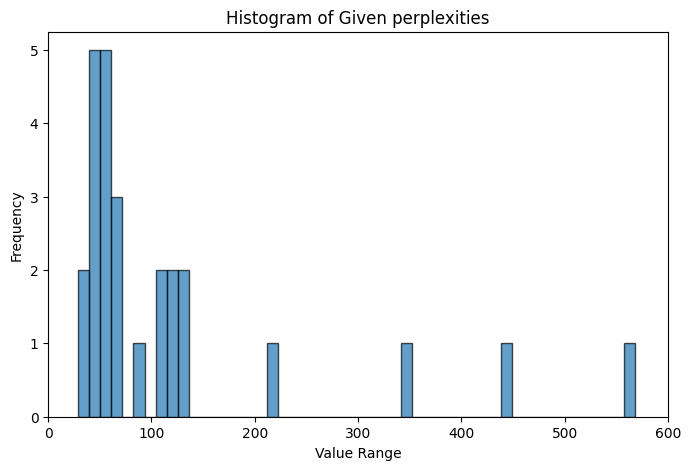

In [40]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(processed_list, bins=50, edgecolor='black', alpha=0.7)
plt.xlim(0, 600)
# Labels and title
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.title('Histogram of Given perplexities')

# Show plot
plt.show()


In [41]:
print(round(results["mean_perplexity"], 2))

320.84


In [45]:
import random 

def typo(input):
    typo_list=[]
    for i in range(len(input)):
        message = list(input[i])

        typo_prob = 0.1 
        n_chars_to_flip = round(len(message) * typo_prob)
        # is a letter capitalized?
        capitalization = [False] * len(message)
        # make all characters lowercase & record uppercase
        for i in range(len(message)):
            capitalization[i] = message[i].isupper()
            message[i] = message[i].lower()

        # list of characters that will be flipped
        pos_to_flip = []
        for i in range(n_chars_to_flip):
            pos_to_flip.append(random.randint(0, len(message) - 1))

        # dictionary... for each letter list of letters
        # nearby on the keyboard
        nearbykeys = {
            'a': ['q','w','s','x','z'],
            'b': ['v','g','h','n'],
            'c': ['x','d','f','v'],
            'd': ['s','e','r','f','c','x'],
            'e': ['w','s','d','r'],
            'f': ['d','r','t','g','v','c'],
            'g': ['f','t','y','h','b','v'],
            'h': ['g','y','u','j','n','b'],
            'i': ['u','j','k','o'],
            'j': ['h','u','i','k','n','m'],
            'k': ['j','i','o','l','m'],
            'l': ['k','o','p'],
            'm': ['n','j','k','l'],
            'n': ['b','h','j','m'],
            'o': ['i','k','l','p'],
            'p': ['o','l'],
            'q': ['w','a','s'],
            'r': ['e','d','f','t'],
            's': ['w','e','d','x','z','a'],
            't': ['r','f','g','y'],
            'u': ['y','h','j','i'],
            'v': ['c','f','g','v','b'],
            'w': ['q','a','s','e'],
            'x': ['z','s','d','c'],
            'y': ['t','g','h','u'],
            'z': ['a','s','x'],
            ' ': ['c','v','b','n','m']
        }

        # insert typos
        for pos in pos_to_flip:
            # try-except in case of special characters
            try:
                typo_arrays = nearbykeys[message[pos]]
                message[pos] = random.choice(typo_arrays)
            except:
                break

        # reinsert capitalization
        for i in range(len(message)):
            if (capitalization[i]):
                message[i] = message[i].upper()

        # recombine the message into a string
        message = ''.join(message)
        typo_list.append(message)

    # show the message in the console
    return typo_list


In [51]:
# input=['Hi world','Hello worrlD']
typo_list=typo(input_text)
# typo_list
results=perplexity.compute(model_id="gpt2",predictions=typo_list)
value_list=results['perplexities']

100%|██████████| 2/2 [00:14<00:00,  7.18s/it]


In [52]:
print(round(results["mean_perplexity"], 2))
value_list

624.73


[1159.665283203125,
 261.3769836425781,
 206.32911682128906,
 1906.0135498046875,
 105.64276885986328,
 49.80228042602539,
 163.38265991210938,
 448.1977844238281,
 77.92696380615234,
 102.88890838623047,
 344.9781494140625,
 125.95186614990234,
 224.6983184814453,
 829.0062866210938,
 5530.88427734375,
 93.0064697265625,
 891.1807250976562,
 371.67462158203125,
 263.8297424316406,
 1038.173828125,
 277.5188293457031,
 744.8153076171875,
 312.7859802246094,
 314.98419189453125,
 912.9772338867188,
 65.90258026123047,
 44.088661193847656]

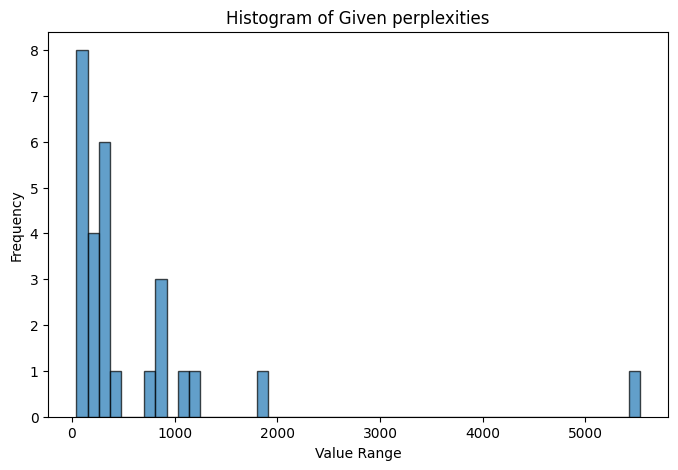

In [54]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(value_list, bins=50, edgecolor='black', alpha=0.7)
# plt.xlim(0, 600)
# Labels and title
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.title('Histogram of Given perplexities')

# Show plot
plt.show()